Welcome to JupyROOT 6.28/00


Warning in <TFile::Append>: Replacing existing TH1: int_vecchio (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: int_caen (Potential memory leak).


508

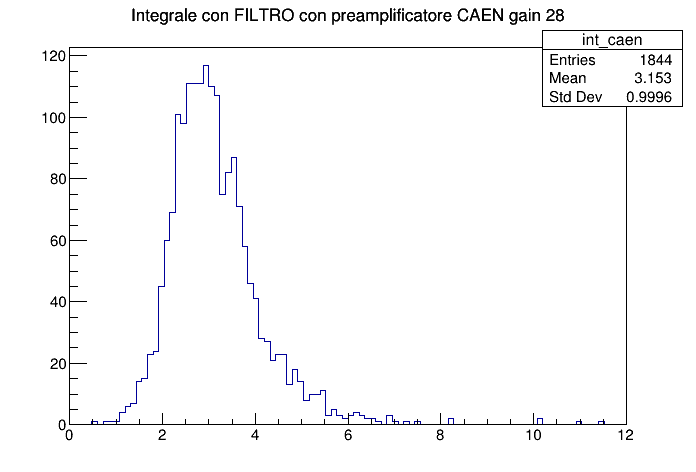

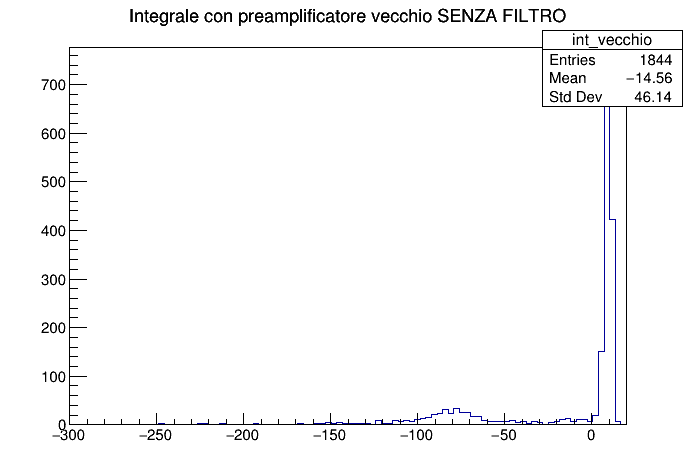

In [1]:
import ROOT
espe = ROOT.TFile.Open("espe.root", "RECREATE")

import glob
import pandas as pd
df = pd.read_csv(glob.glob('*.txt')[0], sep = " ", skiprows=22)

A0 = ROOT.TH1F("int_vecchio", "Integrale con preamplificatore vecchio SENZA FILTRO", 100, 00, 00)
A = ROOT.TH1F("int_vecchio", "Integrale con preamplificatore vecchio SENZA FILTRO", 100, -300, 20)

B0 = ROOT.TH1F("int_caen", "Integrale con FILTRO con preamplificatore CAEN gain 28", 100, 00, 00)
B = ROOT.TH1F("int_caen", "Integrale con FILTRO con preamplificatore CAEN gain 28", 100, 0, 12)

B.Reset('ICES')
A.Reset('ICES')

unique_frames = df['frame'].unique()
for frame in unique_frames:
    frame_data = df[df['frame'] == frame]
    max_y1 = frame_data['C1'].max()
    sum_y1 = frame_data['C1'].sum()
    sum_y2 = frame_data['C2'].sum()
    
    B0.Fill(sum_y1)
    A0.Fill(sum_y2)
    B.Fill(sum_y1)
    A.Fill(sum_y2)
        
c_integrale1=ROOT.TCanvas()
c_integrale1.Draw()
B.Draw("")

c_integrale2=ROOT.TCanvas()
c_integrale2.Draw()
A.Draw("")

espe.WriteObject(A0, "A0")
espe.WriteObject(A, "A")
espe.WriteObject(B0, "B0")
espe.WriteObject(B, "B")
